# Project part 1

In [161]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from isc301.config import house_raw_path

## Data analysis

In [162]:
df = pd.read_csv(house_raw_path)
df.head()

,surf_hab,qualite_materiau,surface_sous_sol,qualite_globale,n_garage_voitures,n_toilettes,n_cheminees,n_pieces,n_cuisines,n_chambres_coucher,annee_vente,prix,type_toit,type_batiment,qualite_cuisine,surface_jardin
0,1710,7,856,5,2,1,0,8,1,3,2008,208500,2 pans,individuelle,bonne,451.271415
1,1262,6,1262,8,2,0,1,6,1,3,2007,181500,2 pans,individuelle,moyenne,0.000000
2,1786,7,920,5,2,1,1,6,1,3,2008,223500,2 pans,individuelle,bonne,466.368854
3,1717,7,756,5,3,0,1,7,1,3,2006,140000,2 pans,individuelle,bonne,152.302986
4,2198,8,1145,5,3,1,1,9,1,4,2008,250000,2 pans,individuelle,bonne,378.184663


<Axes: >

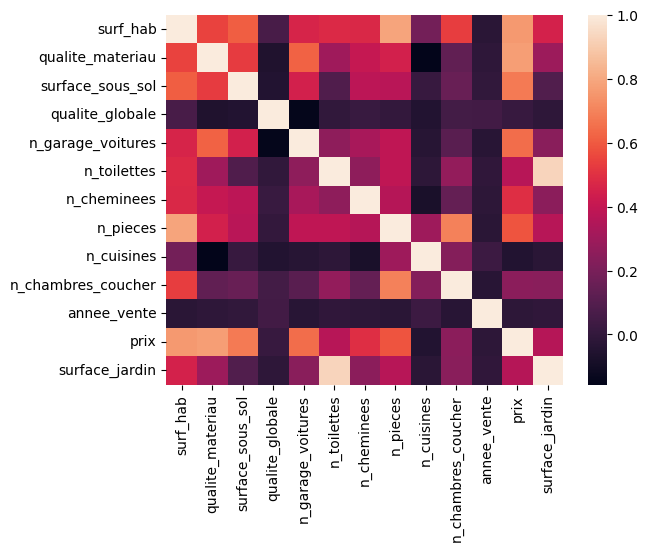

In [163]:
corr = df.select_dtypes("number").corr()

sns.heatmap(corr)

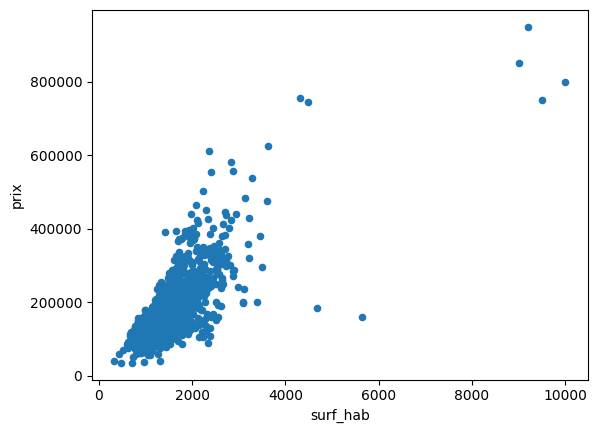

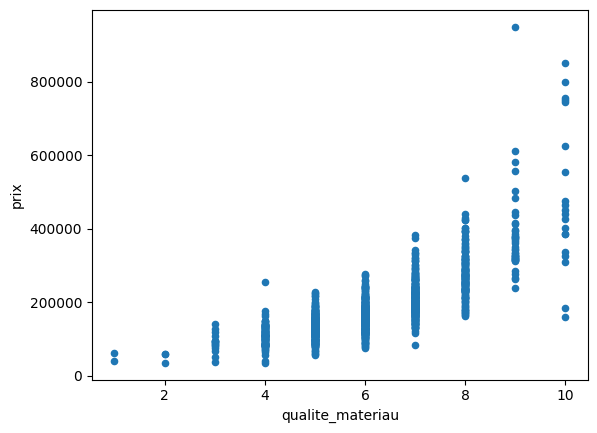

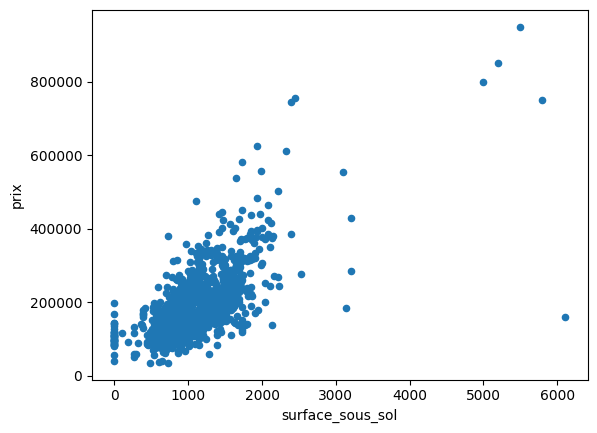

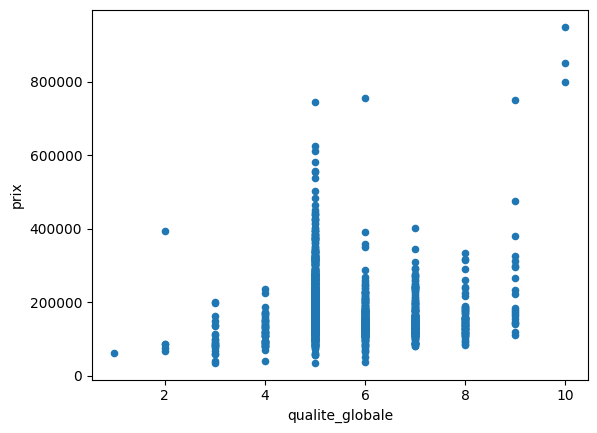

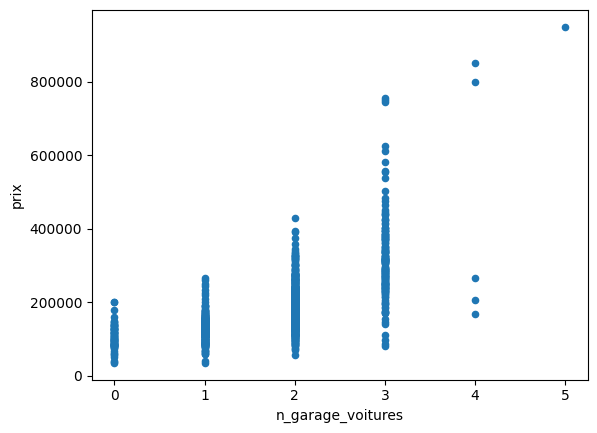

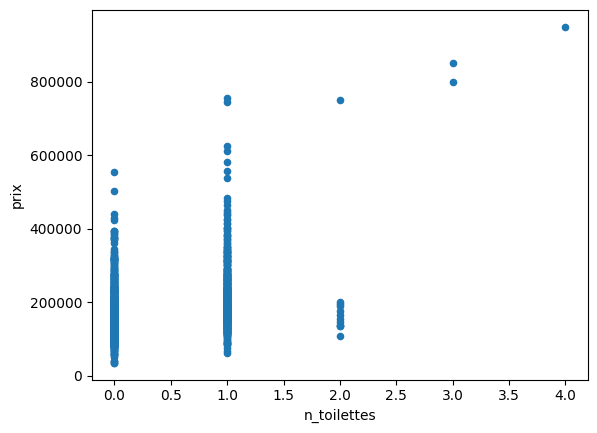

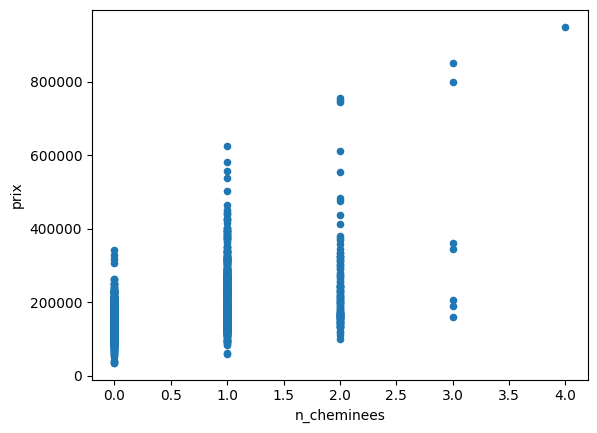

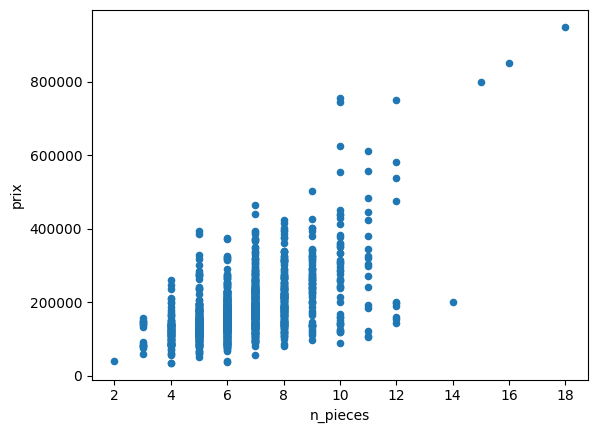

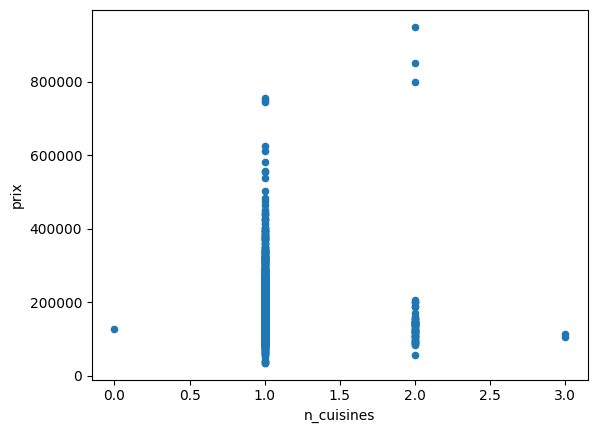

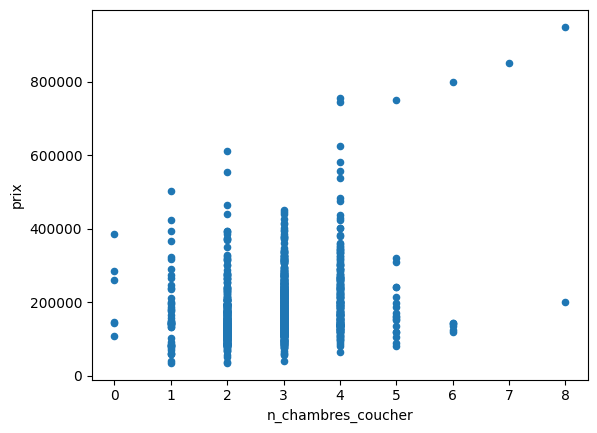

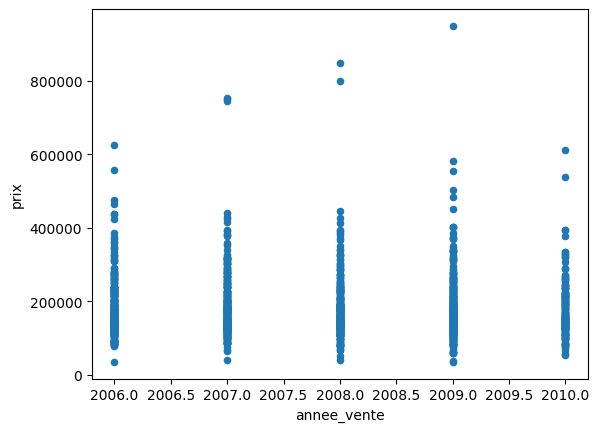

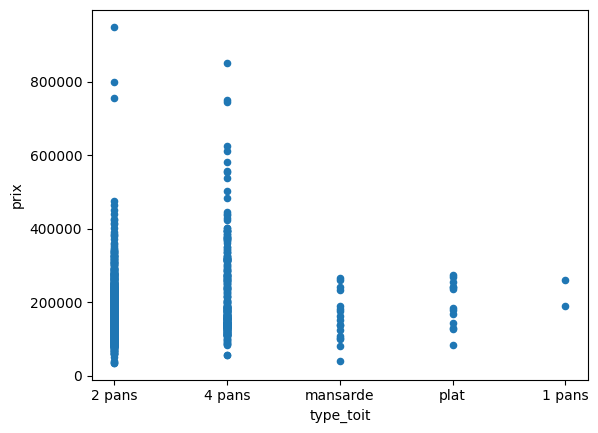

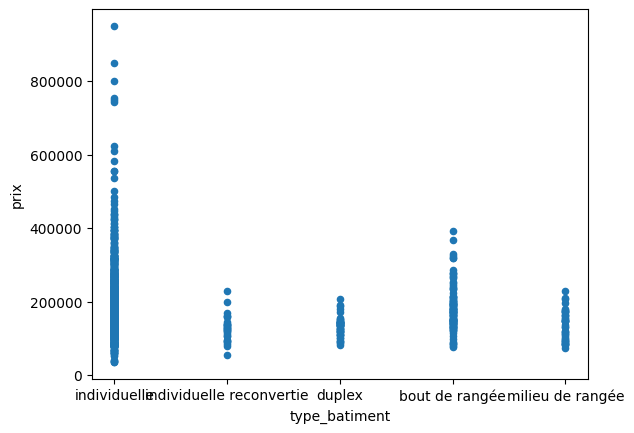

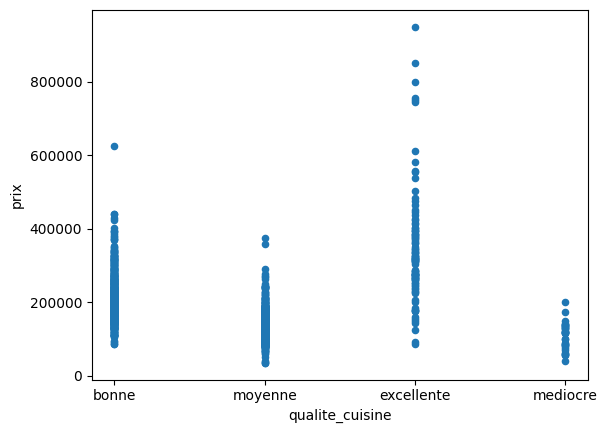

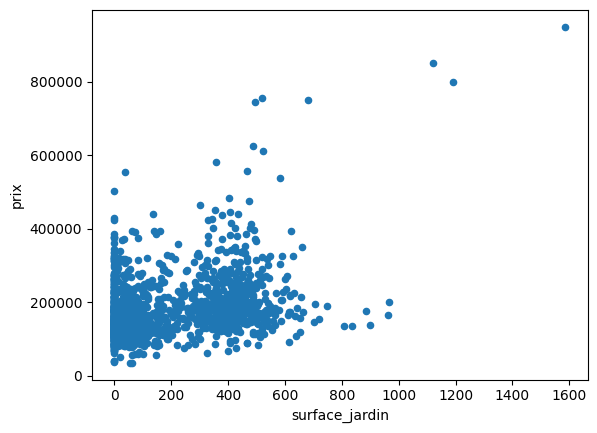

In [164]:
for col in df.columns:
    if col != "prix":
        df.plot.scatter(x=col, y="prix")

plt.show()

## Data cleaning

In [165]:
mapping = {"mediocre": 1, "moyenne": 2, "bonne": 3, "excellente": 4}

df["qualite_cuisine_nbre"] = df["qualite_cuisine"].map(mapping)
df["batiment_individuel"] = np.where(df["type_batiment"] == "individuelle", 1, 0)
df.head()

,surf_hab,qualite_materiau,surface_sous_sol,qualite_globale,n_garage_voitures,n_toilettes,n_cheminees,n_pieces,n_cuisines,n_chambres_coucher,annee_vente,prix,type_toit,type_batiment,qualite_cuisine,surface_jardin,qualite_cuisine_nbre,batiment_individuel
0,1710,7,856,5,2,1,0,8,1,3,2008,208500,2 pans,individuelle,bonne,451.271415,3,1
1,1262,6,1262,8,2,0,1,6,1,3,2007,181500,2 pans,individuelle,moyenne,0.000000,2,1
2,1786,7,920,5,2,1,1,6,1,3,2008,223500,2 pans,individuelle,bonne,466.368854,3,1
3,1717,7,756,5,3,0,1,7,1,3,2006,140000,2 pans,individuelle,bonne,152.302986,3,1
4,2198,8,1145,5,3,1,1,9,1,4,2008,250000,2 pans,individuelle,bonne,378.184663,3,1


## Data spleeting

In [166]:
seed = 10
X_train, X_temp, y_train, y_temp = train_test_split(
    df.loc[:, df.columns != "prix"], df["prix"], test_size=0.4, random_state=seed
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=seed
)
X_train.head()

,surf_hab,qualite_materiau,surface_sous_sol,qualite_globale,n_garage_voitures,n_toilettes,n_cheminees,n_pieces,n_cuisines,n_chambres_coucher,annee_vente,type_toit,type_batiment,qualite_cuisine,surface_jardin,qualite_cuisine_nbre,batiment_individuel
1229,1507,5,1075,5,1,0,0,7,1,4,2008,4 pans,individuelle,moyenne,221.052300,2,1
858,1370,7,1090,5,2,0,1,6,1,3,2009,2 pans,individuelle,moyenne,0.000000,2,1
53,1842,9,1842,5,3,1,1,5,1,0,2006,2 pans,individuelle,bonne,462.367629,3,1
342,1040,3,0,4,2,0,0,6,2,2,2006,2 pans,duplex,moyenne,24.496657,2,0
132,1327,5,1063,6,2,0,0,7,1,3,2007,2 pans,individuelle,bonne,0.000000,3,1


## Metrics functions

In [167]:
def get_metrics(y: np.ndarray, y_predict: np.ndarray):
    return (
        r2_score(y, y_predict),
        np.sqrt(mean_squared_error(y, y_predict)),
        mean_absolute_error(y, y_predict),
    )

In [168]:
def print_metrics(y: np.ndarray, y_predict: np.ndarray):
    print("R² :", r2_score(y, y_predict))
    print("RMSE :", np.sqrt(mean_squared_error(y, y_predict)))
    print("MAE :", mean_absolute_error(y, y_predict))

In [169]:
def plot_residual(y: np.ndarray, y_predict: np.ndarray):
    residuals = y - y_predict

    plt.scatter(y, residuals, alpha=0.6)
    plt.axhline(y=0, color="red", linestyle="--", linewidth=2)

    plt.xlabel("Actual Price")
    plt.ylabel("Residuals (Actual - Predicted)")
    plt.title("Residuals vs Actual Price")
    plt.show()

## Model 1

R² : 0.8019597326647032
RMSE : 38464.37856249281
MAE : 23962.543091143594


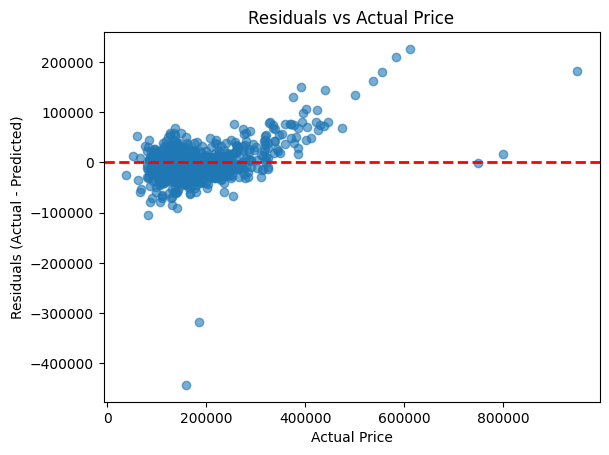

In [170]:
features = [
    "surf_hab",
    "qualite_materiau",
    "qualite_cuisine_nbre",
    "batiment_individuel",
    "n_pieces",
    "n_chambres_coucher",
    "surface_sous_sol",
    "surface_jardin",
    "n_garage_voitures",
]

model = LinearRegression()
model.fit(X_train[features], y_train)
y_pred = model.predict(X_train[features])

print_metrics(y_train, y_pred)
plot_residual(y_train, y_pred)


=== VALIDATION ===
R² : 0.7956347678070907
RMSE : 40608.876008334526
MAE : 25310.308389073594


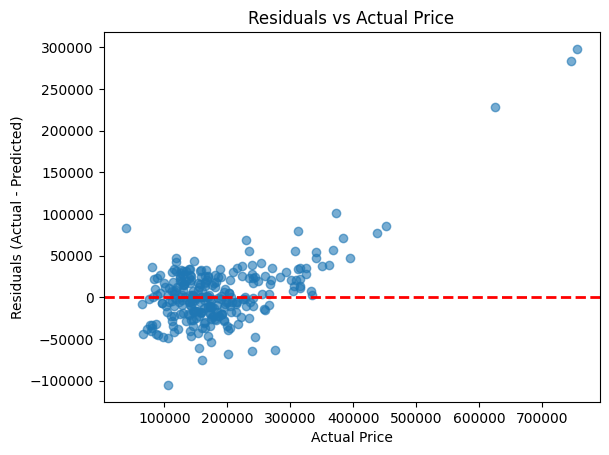

In [171]:
y_pred_val = model.predict(X_val[features])

print("\n=== VALIDATION ===")
print_metrics(y_val, y_pred_val)
plot_residual(y_val, y_pred_val)

## Model 2

R² : 0.883803521055106
RMSE : 29463.10085073644
MAE : 20565.60260647694


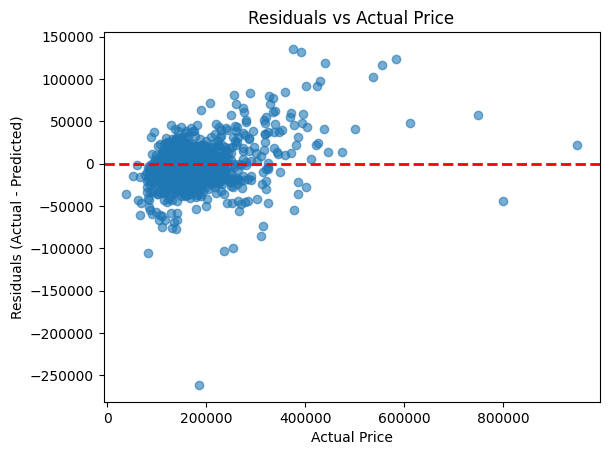

In [172]:
features = [
    "surf_hab",
    "qualite_materiau",
    "qualite_cuisine_nbre",
    "batiment_individuel",
    "n_pieces",
    "n_chambres_coucher",
    "surface_sous_sol",
    "surface_jardin",
    "n_garage_voitures",
]

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_train[features])

model_poly = LinearRegression()
model_poly.fit(X_poly, y_train)
y_pred_poly = model_poly.predict(X_poly)

print_metrics(y_train, y_pred_poly)
plot_residual(y_train, y_pred_poly)


=== VALIDATION ===
R² : 0.8476316027145597
RMSE : 35064.278915626295
MAE : 23479.62945081511


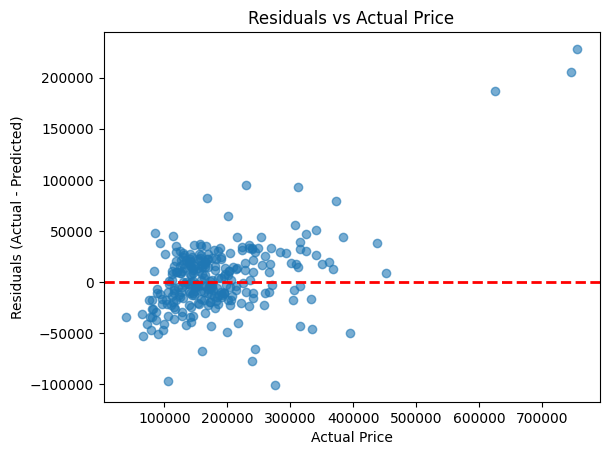

In [173]:
X_poly_val = poly.transform(X_val[features])
y_pred_val_poly = model_poly.predict(X_poly_val)

print("\n=== VALIDATION ===")
print_metrics(y_val, y_pred_val_poly)
plot_residual(y_val, y_pred_val_poly)

## Model 3

R² : 0.8815727568286998
RMSE : 29744.575696183278
MAE : 20737.620295019817


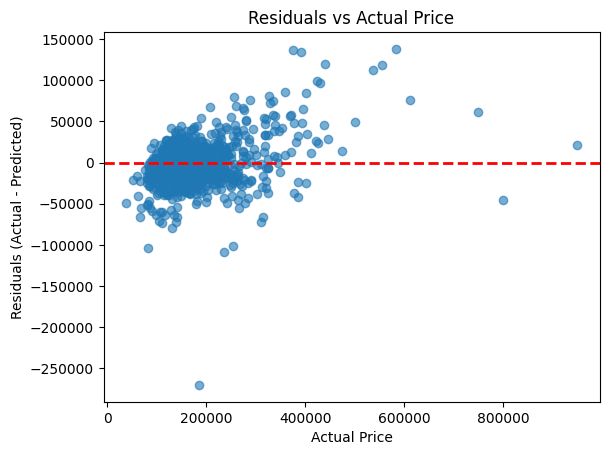

In [174]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_train[features])

ridge = Ridge(alpha=10.0, max_iter=10000)
ridge.fit(X_poly, y_train)
y_pred_ridge = ridge.predict(X_poly)

print_metrics(y_train, y_pred_ridge)
plot_residual(y_train, y_pred_ridge)


=== VALIDATION ===
R² : 0.8563922755400866
RMSE : 34041.3177057327
MAE : 23307.169373213655


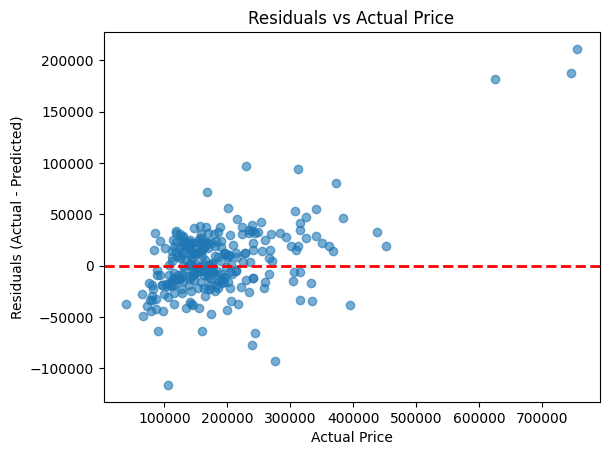

In [175]:
X_poly_val = poly.transform(X_val[features])
y_pred_val_ridge = ridge.predict(X_poly_val)

print("\n=== VALIDATION ===")
print_metrics(y_val, y_pred_val_ridge)
plot_residual(y_val, y_pred_val_ridge)

## Model comparison

,R²,RMSE,MAE
Linear,0.795635,40608.876008,25310.308389
Polynomial (deg=2),0.847632,35064.278916,23479.629451
Ridge (alpha=10),0.856392,34041.317706,23307.169373


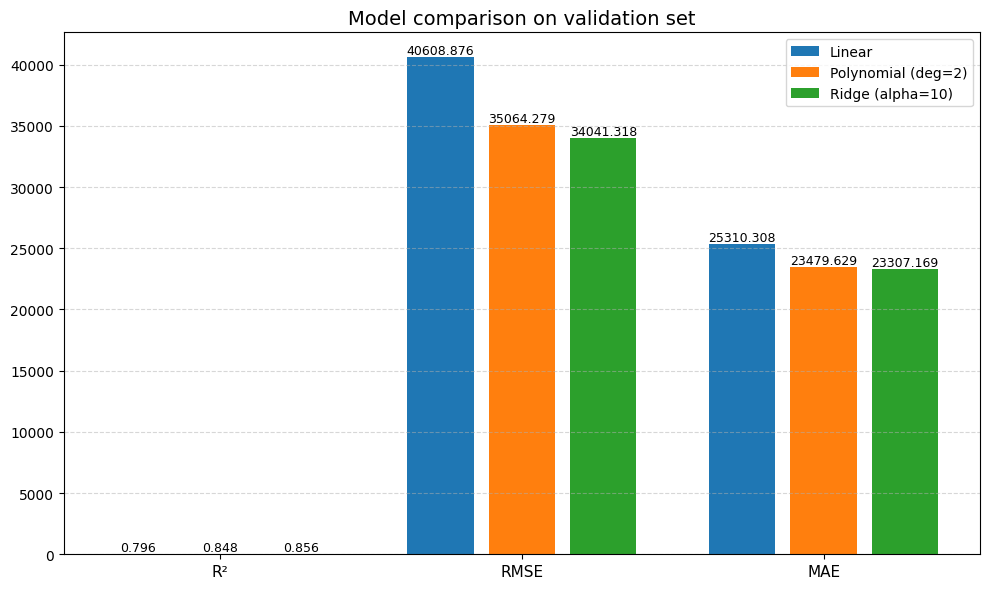

In [176]:
metrics_data = {
    "Linear": get_metrics(y_val, y_pred_val),
    "Polynomial (deg=2)": get_metrics(y_val, y_pred_val_poly),
    "Ridge (alpha=10)": get_metrics(y_val, y_pred_val_ridge),
}

# Convert to DataFrame
metrics_df = pd.DataFrame(metrics_data, index=["R²", "RMSE", "MAE"]).T
display(metrics_df)

# Plot comparison
fig, ax = plt.subplots(figsize=(10, 6))

x = np.arange(len(metrics_df.columns))  # positions for metrics (R², RMSE, MAE)
bar_width = 0.22
offsets = (np.arange(len(metrics_df)) - (len(metrics_df) - 1) / 2) * (bar_width + 0.05)

for i, (model, row) in enumerate(metrics_df.iterrows()):
    ax.bar(x + offsets[i], row.values, width=bar_width, label=model)
    # annotate values
    for j, val in enumerate(row.values):
        ax.text(
            x[j] + offsets[i], val, f"{val:.3f}", ha="center", va="bottom", fontsize=9
        )

ax.set_xticks(x)
ax.set_xticklabels(metrics_df.columns, fontsize=11)
ax.set_title("Model comparison on validation set", fontsize=14)
ax.grid(axis="y", linestyle="--", alpha=0.5)
ax.legend()
plt.tight_layout()
plt.show()